In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline




In [2]:
av = pd.read_csv('avocado.csv', index_col=0)

In [3]:
av.head()
# we need to find average price per day per region, since we have the same day for several cities in the same state
# how do we do that???? does it affect stationarity, how do we deal with it?

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
av.rename(columns={'4046':'small', '4225':'medium', '4770':'large'}, inplace=True)

In [5]:
av.drop(columns=['Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'], inplace=True)

In [7]:
av.shape

(18249, 9)

# creating date time object in date column

In [6]:
av['Date'] = pd.to_datetime(av['Date'], format='%Y-%m-%d')

In [7]:
av.head()

,Date,AveragePrice,Total Volume,small,medium,large,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,conventional,2015,Albany


In [138]:
av.set_index('Date', inplace=True)

# simple EDA

In [ ]:
sns.pairplot(av)

In [ ]:
# Function to plot each feature vs target variable
def plot_features(df, features):
    pp_rows = [features[i:i+4] for i in range(0, len(features), 4)]
    for row in pp_rows:
        pp = sns.pairplot(data=df, x_vars=row, y_vars='AveragePrice', kind='reg', height=3)
    return plt.show()

features = av.drop(['type', 'year', 'region', 'Date'], axis=1).keys()
plot_features(av, features)

In [ ]:
av.isnull().sum()

In [ ]:
av.groupby('region')['AveragePrice'].plot()

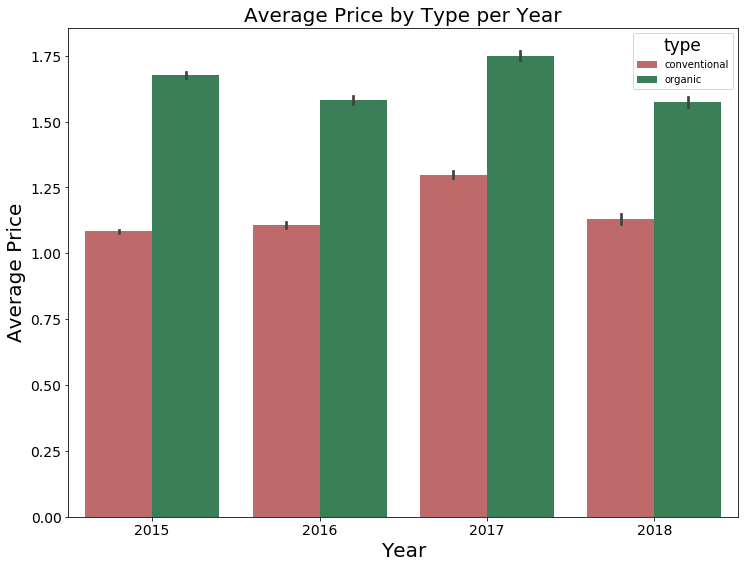

In [228]:
flatui = ['indianred','seagreen']

fig, ax = plt.subplots(figsize=(12,9))
ax = sns.barplot(x='year', y='AveragePrice', hue='type', data=avocado, palette=flatui)
ax.set_title('Average Price by Type per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Average Price')

plt.rc('axes', titlesize=20, )     # fontsize of the axes title
plt.rc('axes', labelsize= 20)  # fontsize of the x and y labels
plt.rc('xtick', labelsize = 14)    # fontsize of the tick labels
plt.rc('ytick', labelsize = 14)

Text(0.5, 1.0, 'Total Number of Avocados Purchased by State')

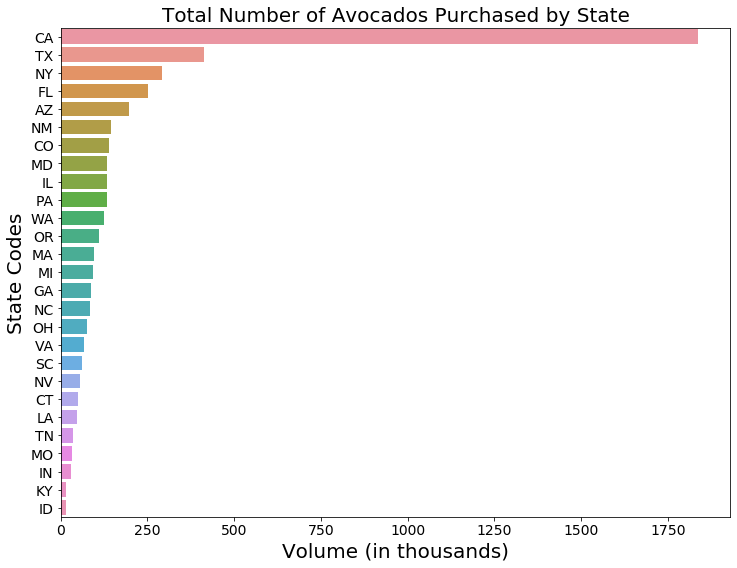

In [287]:
graph2 = avocado.groupby('region')['Total Volume'].sum().sort_values(ascending = False)
fig,ax = plt.subplots(figsize = (12,9))
ax = sns.barplot((graph2.values)/1000000, graph2.index)
ax.set_xlabel('Volume (in thousands)')
ax.set_ylabel('State Codes')
ax.set_title('Total Number of Avocados Purchased by State')

# removing regions and combining multiple cities into a single state

In [ ]:
av['region'].unique()

In [269]:
 stat = {'Albany':'NY', 'Atlanta':'GA', 'BaltimoreWashington':'MD', 'Boise':'ID','Boston':'MA',
         'BuffaloRochester':'NY', 'California':'CA', 'Charlotte':'NC', 'Chicago':'IL', 'Detroit':'MI',
         'GrandRapids':'MI', 'GreatLakes':'greatlakes', 'HarrisburgScranton':'PA', 'HartfordSpringfield': 'CT',
         'Houston':'TX', 'Indianapolis':'IN', 'Jacksonville':'FL', 'LasVegas':'NV', 'LosAngeles':'CA',
         'Louisville':'KY', 'MiamiFtLauderdale':'FL', 'Midsouth':'midsouth', 'Nashville':'TN',
         'NewOrleansMobile':'LA', 'NewYork':'NY', 'Northeast':'northeast',
         'NorthernNewEngland':'northernnewengland', 'Orlando':'FL', 'Philadelphia':'PA', 'PhoenixTucson':'AZ',
         'Pittsburgh':'PA', 'Plains':'plains', 'Portland':'OR', 'RaleighGreensboro':'NC', 
         'RichmondNorfolk':'VA', 'Roanoke':'VA', 'Sacramento':'CA', 'SanDiego':'CA', 'SanFrancisco':'CA',
         'Seattle':'WA', 'SouthCarolina':'SC', 'SouthCentral':'southcentral', 'Southeast':'southeast',
         'Spokane':'WA', 'StLouis':'MO', 'Syracuse':'NY', 'Tampa':'FL', 'TotalUS':'USA', 'West':'west', 
         'WestTexNewMexico':'NM', 'CincinnatiDayton':'OH', 'Columbus':'OH', 'DallasFtWorth':'TX', 'Denver':'CO'}

# northeast, midsouth, southeast, south central, west, great lakes, northern new england, totalUS


'''aggregate the west ourselves and see if the pre-made aggregated west region correctly represents the data'''

'aggregate the west ourselves and see if the pre-made aggregated west region correctly represents the data'

In [270]:
cities = list(set(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico']) - set(['Northeast', 'Midsouth', 'Southeast', 'SouthCentral', 'West', 'GreatLakes', 'TotalUS', 'NorthernNewEngland', 'Plains']))


In [271]:
cities

['BaltimoreWashington',
 'DallasFtWorth',
 'Charlotte',
 'Orlando',
 'WestTexNewMexico',
 'PhoenixTucson',
 'Louisville',
 'Detroit',
 'StLouis',
 'Pittsburgh',
 'LosAngeles',
 'Boston',
 'BuffaloRochester',
 'Chicago',
 'CincinnatiDayton',
 'Denver',
 'Spokane',
 'Indianapolis',
 'RichmondNorfolk',
 'Philadelphia',
 'Jacksonville',
 'Syracuse',
 'NewYork',
 'Houston',
 'Albany',
 'SanFrancisco',
 'Roanoke',
 'Sacramento',
 'SanDiego',
 'Seattle',
 'Portland',
 'GrandRapids',
 'SouthCarolina',
 'HartfordSpringfield',
 'Atlanta',
 'LasVegas',
 'California',
 'Nashville',
 'Columbus',
 'MiamiFtLauderdale',
 'Tampa',
 'RaleighGreensboro',
 'HarrisburgScranton',
 'NewOrleansMobile',
 'Boise']

In [272]:
avocado = av[av['region'].isin(cities)].copy()

In [140]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15207 entries, 2015-12-27 to 2018-01-07
Data columns (total 8 columns):
AveragePrice    15207 non-null float64
Total Volume    15207 non-null float64
small           15207 non-null float64
medium          15207 non-null float64
large           15207 non-null float64
type            15207 non-null object
year            15207 non-null int64
region          15207 non-null object
dtypes: float64(5), int64(1), object(2)
memory usage: 1.0+ MB


In [141]:
avocado

,AveragePrice,Total Volume,small,medium,large,type,year,region
Date,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,conventional,2015,Albany
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,conventional,2015,Albany
2015-12-13,0.93,118220.22,794.70,109149.67,130.50,conventional,2015,Albany
2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,conventional,2015,Albany
2015-11-29,1.28,51039.60,941.48,43838.39,75.78,conventional,2015,Albany
...,...,...,...,...,...,...,...,...
2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,organic,2018,WestTexNewMexico
2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,organic,2018,WestTexNewMexico
2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,organic,2018,WestTexNewMexico


In [12]:
avocado.shape

(15207, 9)

In [274]:
avocado.replace({'region':stat}, inplace=True)

In [49]:
avocado.groupby(['Date'])['AveragePrice'].mean()

Date
2015-01-04    1.302444
2015-01-11    1.374778
2015-01-18    1.397000
2015-01-25    1.401667
2015-02-01    1.247889
                ...   
2018-02-25    1.365000
2018-03-04    1.356333
2018-03-11    1.340111
2018-03-18    1.314222
2018-03-25    1.350778
Name: AveragePrice, Length: 169, dtype: float64

In [17]:
avocado.groupby('region')['Total Volume'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
az,338.0,5.788264e+05,5.974847e+05,4881.79,11449.3575,339075.580,1.138581e+06,2200550.27
ca,1690.0,1.087375e+06,1.867886e+06,3562.52,22347.4175,251731.110,7.659474e+05,11213596.29
co,338.0,4.109542e+05,3.940824e+05,6554.93,27517.2050,329377.845,7.663101e+05,1381528.74
ct,338.0,1.499128e+05,1.474348e+05,1494.63,8060.3800,111484.915,2.811244e+05,522565.33
fl,1352.0,1.857459e+05,2.258621e+05,84.56,3721.9050,53105.295,3.355664e+05,1310671.51
ga,338.0,2.621453e+05,2.631071e+05,3047.38,10989.8975,182673.440,4.907090e+05,957792.07
id,338.0,4.264257e+04,4.247940e+04,562.64,2212.7675,28988.585,8.132399e+04,136377.55
il,338.0,3.955690e+05,3.846002e+05,9910.84,29956.2450,231780.020,7.639302e+05,1802646.35
in,338.0,8.953666e+04,8.911021e+04,964.25,3746.8175,60553.145,1.680288e+05,335442.41


# creating df for different types of avocados

In [142]:
conventional = avocado[avocado['type'] == 'conventional']
conventional.head()

,AveragePrice,Total Volume,small,medium,large,type,year,region
Date,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,conventional,2015,Albany
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,conventional,2015,Albany
2015-12-13,0.93,118220.22,794.70,109149.67,130.50,conventional,2015,Albany
2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,conventional,2015,Albany
2015-11-29,1.28,51039.60,941.48,43838.39,75.78,conventional,2015,Albany


In [143]:
organic = avocado[avocado['type'] == 'organic']

In [144]:
organic.head()

,AveragePrice,Total Volume,small,medium,large,type,year,region
Date,,,,,,,,
2015-12-27,1.83,989.55,8.16,88.59,0.0,organic,2015,Albany
2015-12-20,1.89,1163.03,30.24,172.14,0.0,organic,2015,Albany
2015-12-13,1.85,995.96,10.44,178.70,0.0,organic,2015,Albany
2015-12-06,1.84,1158.42,90.29,104.18,0.0,organic,2015,Albany
2015-11-29,1.94,831.69,0.00,94.73,0.0,organic,2015,Albany


In [110]:
conventional.groupby('Date')['AveragePrice'].mean()

Date
2015-01-04    1.014667
2015-01-11    1.119333
2015-01-18    1.144667
2015-01-25    1.124444
2015-02-01    0.966000
                ...   
2018-02-25    1.141333
2018-03-04    1.145778
2018-03-11    1.142889
2018-03-18    1.094222
2018-03-25    1.152222
Name: AveragePrice, Length: 169, dtype: float64

In [146]:
organic.groupby('Date')['AveragePrice'].mean()

Date
2015-01-04    1.590222
2015-01-11    1.630222
2015-01-18    1.649333
2015-01-25    1.678889
2015-02-01    1.529778
                ...   
2018-02-25    1.588667
2018-03-04    1.566889
2018-03-11    1.537333
2018-03-18    1.534222
2018-03-25    1.549333
Name: AveragePrice, Length: 169, dtype: float64

In [ ]:
organic.groupby('region')['AveragePrice'].plot()

region
az    AxesSubplot(0.125,0.125;0.775x0.755)
ca    AxesSubplot(0.125,0.125;0.775x0.755)
co    AxesSubplot(0.125,0.125;0.775x0.755)
ct    AxesSubplot(0.125,0.125;0.775x0.755)
fl    AxesSubplot(0.125,0.125;0.775x0.755)
ga    AxesSubplot(0.125,0.125;0.775x0.755)
id    AxesSubplot(0.125,0.125;0.775x0.755)
il    AxesSubplot(0.125,0.125;0.775x0.755)
in    AxesSubplot(0.125,0.125;0.775x0.755)
ky    AxesSubplot(0.125,0.125;0.775x0.755)
la    AxesSubplot(0.125,0.125;0.775x0.755)
ma    AxesSubplot(0.125,0.125;0.775x0.755)
md    AxesSubplot(0.125,0.125;0.775x0.755)
mi    AxesSubplot(0.125,0.125;0.775x0.755)
mo    AxesSubplot(0.125,0.125;0.775x0.755)
nc    AxesSubplot(0.125,0.125;0.775x0.755)
nm    AxesSubplot(0.125,0.125;0.775x0.755)
nv    AxesSubplot(0.125,0.125;0.775x0.755)
ny    AxesSubplot(0.125,0.125;0.775x0.755)
oh    AxesSubplot(0.125,0.125;0.775x0.755)
or    AxesSubplot(0.125,0.125;0.775x0.755)
pa    AxesSubplot(0.125,0.125;0.775x0.755)
sc    AxesSubplot(0.125,0.125;0.775x0.755)
tn  

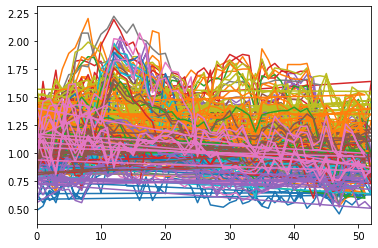

In [20]:
conventional.groupby('region')['AveragePrice'].plot()

In [23]:
table = pd.pivot_table(organic, values='AveragePrice', index=['Date', 'region'], aggfunc=np.mean)

In [34]:
table

AveragePrice
Date       region              
2015-01-04 az            1.1200
           ca            1.2460
           co            1.4200
           ct            2.3200
           fl            1.7825
...                         ...
2018-03-25 sc            1.3800
           tn            1.4800
           tx            1.3850
           va            1.5100
           wa            1.5350

[4560 rows x 1 columns]

In [69]:
for reg in stat.values():
    pivots = pd.DataFrame(columns=['Date', 'region', 'AveragePrice'])
    pivots = pivots.append(organic[organic.region == reg].pivot_table(values='AveragePrice', index=['Date', 'region'], aggfunc=np.mean))
    

/Users/samraykhman/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [72]:
pivots.reset_index()

,index,AveragePrice,Date,region
0,"(2015-01-04 00:00:00, co)",1.42,NaN,NaN
1,"(2015-01-11 00:00:00, co)",1.28,NaN,NaN
2,"(2015-01-18 00:00:00, co)",1.10,NaN,NaN
3,"(2015-01-25 00:00:00, co)",1.33,NaN,NaN
4,"(2015-02-01 00:00:00, co)",1.29,NaN,NaN
...,...,...,...,...
164,"(2018-02-25 00:00:00, co)",1.39,NaN,NaN
165,"(2018-03-04 00:00:00, co)",1.55,NaN,NaN
166,"(2018-03-11 00:00:00, co)",1.59,NaN,NaN
167,"(2018-03-18 00:00:00, co)",1.67,NaN,NaN


In [98]:
type(list(avocado['region'].unique()))

list

In [99]:
#  avocado['region'].unique() === array of state codes
empty = {}
for thing in list(avocado['region'].unique()):
    empty[thing] = organic[organic.region == thing].pivot_table(values=['AveragePrice'], index=['Date', 'region'], aggfunc=np.mean).reset_index(level=['region']).drop(columns='region')
    

In [104]:
empty.items()

dict_items([('ny',             AveragePrice
Date                    
2015-01-04        1.7925
2015-01-11        1.7625
2015-01-18        1.8725
2015-01-25        1.8200
2015-02-01        1.7400
...                  ...
2018-02-25        1.4625
2018-03-04        1.4925
2018-03-11        1.5225
2018-03-18        1.4300
2018-03-25        1.4100

[169 rows x 1 columns]), ('ga',             AveragePrice
Date                    
2015-01-04          1.76
2015-01-11          1.84
2015-01-18          1.86
2015-01-25          1.87
2015-02-01          1.44
...                  ...
2018-02-25          1.55
2018-03-04          1.66
2018-03-11          1.43
2018-03-18          1.48
2018-03-25          1.56

[169 rows x 1 columns]), ('md',             AveragePrice
Date                    
2015-01-04          1.29
2015-01-11          1.22
2015-01-18          1.41
2015-01-25          1.41
2015-02-01          1.15
...                  ...
2018-02-25          1.47
2018-03-04          1.43
2018-03-11     

# dickey fuller test

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
grrt = np.log(av['AveragePrice'])

In [ ]:
avocado['AveragePrice'].diff(periods=1)

In [ ]:
difference(av['AveragePrice'])

In [ ]:
test = adfuller((np.log(avocado['AveragePrice'])))
# test = adfuller(diff['Differenced Observations'][1:-1])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

In [147]:
#conventional prices by date
conventional_by_date = conventional.groupby(['Date'])['AveragePrice'].mean()
conventional_final = (np.log(conventional_by_date)).diff(periods = 1)[1:]
#organic prices by date
organic_by_date = organic.groupby(['Date'])['AveragePrice'].mean()
organic_final = (np.log(organic_by_date)).diff(periods = 1)[1:]

In [148]:
conventional_final

Date
2015-01-11    0.098173
2015-01-18    0.022380
2015-01-25   -0.017824
2015-02-01   -0.151881
2015-02-08    0.072315
                ...   
2018-02-25   -0.029922
2018-03-04    0.003887
2018-03-11   -0.002525
2018-03-18   -0.043515
2018-03-25    0.051649
Name: AveragePrice, Length: 168, dtype: float64

In [150]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARIMA

# conventional final

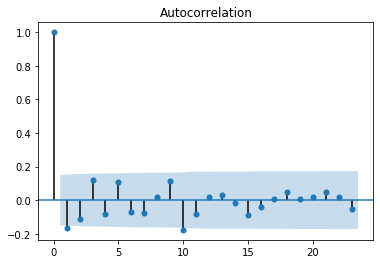

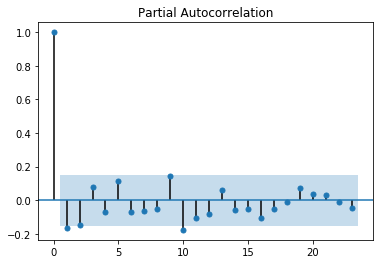

In [154]:
plot_acf(conventional_final)
plot_pacf(conventional_final)
plt.show()

# organic final

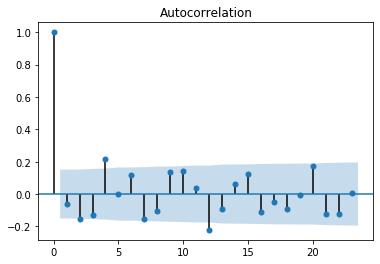

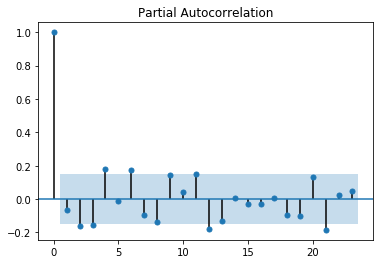

In [156]:
plot_acf(organic_final)
plot_pacf(organic_final)
plt.show()

# ARIMA (organic)

In [176]:
organic_final

Date
2015-01-11    0.024843
2015-01-18    0.011655
2015-01-25    0.017761
2015-02-01   -0.093010
2015-02-08    0.039589
                ...   
2018-02-25    0.001960
2018-03-04   -0.013803
2018-03-11   -0.019043
2018-03-18   -0.002026
2018-03-25    0.009801
Name: AveragePrice, Length: 168, dtype: float64

In [189]:
# dict of arima models for organic
results = {}
for x in [3,4,5,7,13,22,6]:
    for y in [5,13,2]:
        try:
            results[(x,1,y)] = ARIMA(organic['AveragePrice'], order = (x,1,y)).fit(disp=0).summary()
        except ValueError:
            continue

/Users/samraykhman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/samraykhman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/samraykhman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/samraykhman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will b

/Users/samraykhman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/samraykhman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/samraykhman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/samraykhman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecastin

In [192]:
results
#  best order == (4,1,5)

{(3, 1, 5): <class 'statsmodels.iolib.summary.Summary'>
 """
                              ARIMA Model Results                              
 Dep. Variable:         D.AveragePrice   No. Observations:                 7601
 Model:                 ARIMA(3, 1, 5)   Log Likelihood                1309.234
 Method:                       css-mle   S.D. of innovations              0.204
 Date:                Tue, 16 Jun 2020   AIC                          -2598.467
 Time:                        10:55:33   BIC                          -2529.107
 Sample:                             1   HQIC                         -2574.666
                                                                               
                            coef    std err          z      P>|z|      [0.025      0.975]
 ----------------------------------------------------------------------------------------
 const                 9.569e-06   1.03e-05      0.930      0.353   -1.06e-05    2.97e-05
 ar.L1.D.AveragePrice     0.0

# ARIMA (conventional)

In [193]:
#  dict of arima models for conventional
results_c = {}
for x in [2,3,11]:
    for y in [2,11]:
        try:
            results_c[(x,1,y)] = ARIMA(conventional['AveragePrice'], order = (x,1,y)).fit(disp=0).summary()
        except ValueError:
            continue

/Users/samraykhman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/samraykhman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/samraykhman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/samraykhman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has

In [194]:
results_c
# best order == (3,1,2)

{(2, 1, 2): <class 'statsmodels.iolib.summary.Summary'>
 """
                              ARIMA Model Results                              
 Dep. Variable:         D.AveragePrice   No. Observations:                 7604
 Model:                 ARIMA(2, 1, 2)   Log Likelihood                4483.001
 Method:                       css-mle   S.D. of innovations              0.134
 Date:                Tue, 16 Jun 2020   AIC                          -8954.003
 Time:                        13:08:22   BIC                          -8912.384
 Sample:                             1   HQIC                         -8939.721
                                                                               
                            coef    std err          z      P>|z|      [0.025      0.975]
 ----------------------------------------------------------------------------------------
 const                -5.329e-05      0.001     -0.055      0.956      -0.002       0.002
 ar.L1.D.AveragePrice    -0.2

/Users/samraykhman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/samraykhman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/samraykhman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/samraykhman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/User

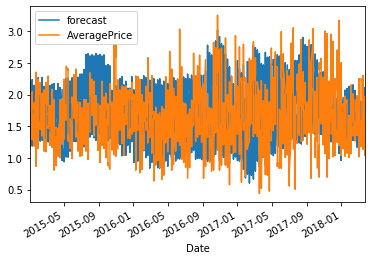

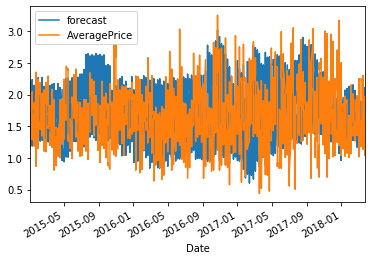

In [202]:
model_org = ARIMA(organic['AveragePrice'], order=(4,1,5))
model_org_fit = model_org.fit(disp=0)
# print(model_fit.summary())
# model_org_fit.plot_predict()

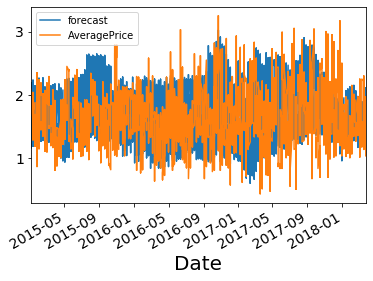

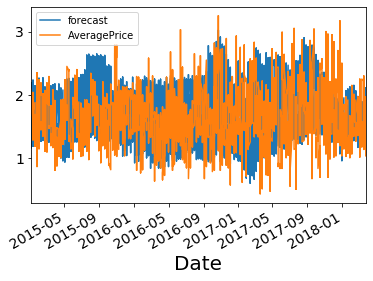

In [290]:
model_org_fit.plot_predict()

/Users/samraykhman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/samraykhman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


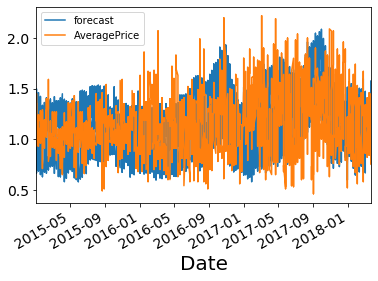

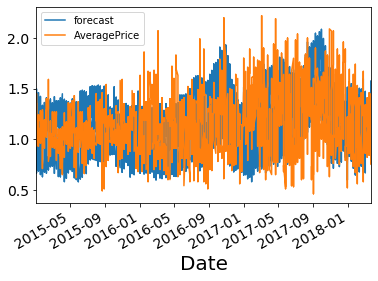

In [289]:
model_con = ARIMA(conventional['AveragePrice'], order=(3,1,2))
model_con_fit = model_con.fit(disp=0)
# print(model_fit.summary())
# model_con_fit.plot_predict()

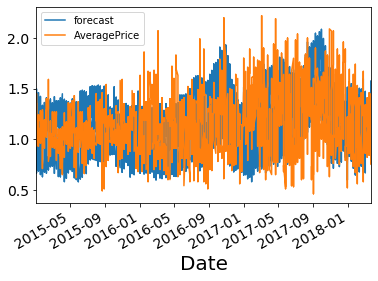

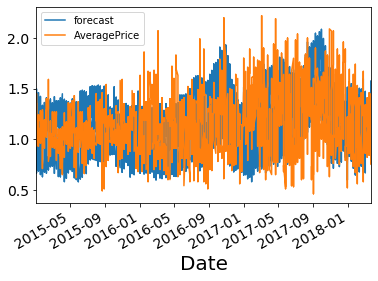

In [291]:
model_con_fit.plot_predict()

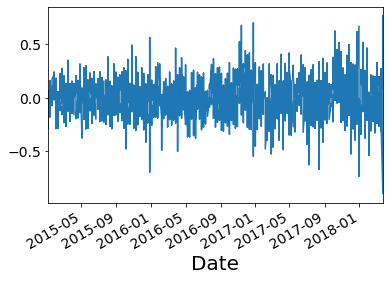

In [294]:
model_con_fit.resid.plot()